# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

You will be able to:
* Solve the monty hall problem using simulations

## Run a Simulation

This is not a traditional application of Bayes' Theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool of Bayesian's&mdash;running a simulation. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid')
import warnings
warnings.simplefilter('ignore')

Win rate without switch: 0.3481781376518219
Win rate with switch: 0.6818181818181818


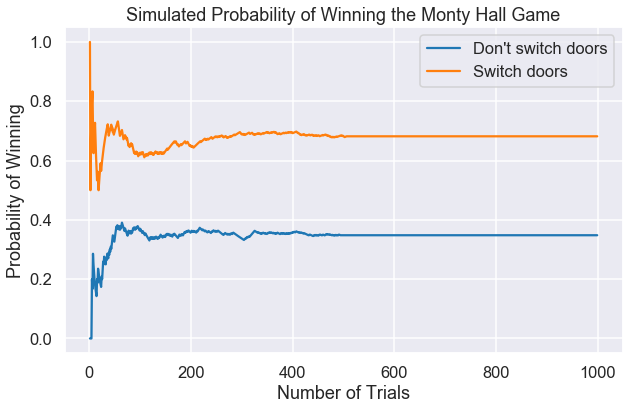

In [51]:
wins_no_switch = []
wins_with_switch = []
x = 1000

for i in range(x):
    options = [1, 2, 3]
    # Get random integer to represent correct choice
    correct = int(np.random.randint(1, 4))
    
    # Get random integer to represent contestant's first choice
    choice1 = int(np.random.randint(1, 4))
    
    goats = [x for x in options if x != correct and x != choice1]
    
    to_open = np.random.choice(goats)
    
    options_2 = [x for x in options if x != to_open]

    # Get random integer to represent contestant's second choice
    choice2 = np.random.choice(options_2)

    # CASE: yes switch, correct choice
    if choice2 != choice1 and choice2 == correct:
        wins_with_switch.append(1)
    elif choice2 != choice1 and choice2 != correct:
        wins_with_switch.append(0)
    
    # CASE: no switch, correct choice
    if choice2 == choice1 and choice2 == correct:
        wins_no_switch.append(1)
    elif choice2 == choice1 and choice2 != correct:
        wins_no_switch.append(0)
        
win_rate_no_switch = np.mean(wins_no_switch)
win_rate_with_switch = np.mean(wins_with_switch)
print('Win rate without switch:', win_rate_no_switch)
print('Win rate with switch:', win_rate_with_switch)

y_switch = [np.mean(wins_with_switch[:i]) for i in range(x)]
y_no_switch = [np.mean(wins_no_switch[:i]) for i in range(x)]

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(range(x), y_no_switch, label='Don\'t switch doors')
plt.plot(range(x), y_switch, label='Switch doors')
plt.ylabel('Probability of Winning')
plt.xlabel('Number of Trials')
plt.title('Simulated Probability of Winning the Monty Hall Game')
plt.legend()
plt.show();


## Summary

In this lab you further investigated the idea of Bayes' Theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully this was an entertaining little experience! 